In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
from termcolor import colored
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')
X_train.head()

,Belts,PersonalInjury,PropertyDamage,CommercialLicense,CommercialVehicle,ContributedToAccident,Gender,VehicleType_'02 - Automobile',VehicleType_'03 - Station Wagon',VehicleType_'04 - Limousine',...,Model_VAN,Model_VERSA,Model_VN,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,ArrestType_Marked Patrol,ArrestType_Unmarked Patrol
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [3]:
y_train.head()

0    2
1    0
2    0
3    2
4    2
Name: ViolationType, dtype: int64

# Normalizacija

Za normalizaciju ćemo iskoristiti MinMaxScaler Vrednosti min i max ćemo odrediti na osnovu trening skupa, a zatim primeniti transformaciju na test i trening skup.

In [4]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [5]:
def report(model, X, y, text = "training"):
    y_pred = model.predict(X)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['Kazna', 'Oprema', 'Upozorenje'], index=['0', '1', '2']))
    print("---------------------------------------------------------------------------------")

## KNN

In [6]:
knn = KNeighborsClassifier(n_neighbors=10)

In [7]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

In [8]:
report(knn, X_train_norm, y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.58      0.59     23810
           1       0.66      0.88      0.76     23810
           2       0.64      0.47      0.54     23810

    accuracy                           0.64     71430
   macro avg       0.64      0.64      0.63     71430
weighted avg       0.64      0.64      0.63     71430

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  13712    4951        5147
1   1639   21047        1124
2   6989    5666       11155
---------------------------------------------------------------------------------


In [9]:
report(knn, X_test_norm, y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.44      0.47      9637
           1       0.06      0.32      0.10      1049
           2       0.53      0.36      0.43     10205

    accuracy                           0.40     20891
   macro avg       0.37      0.38      0.33     20891
weighted avg       0.49      0.40      0.43     20891

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4225    2477        2935
1    383     340         326
2   3804    2695        3706
---------------------------------------------------------------------------------


Probaćemo da unapredimo model podešavanjem hiper-parametara.

# Podešavanje hiper-parametara

## GridSearchCV

U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

Napravićemo dva modela. Prvi koristi uniformnu težinu.

In [10]:
params = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
    'weights' : ['uniform'],
    'p': [1, 2]
}

In [11]:
estimator_uniform = GridSearchCV(KNeighborsClassifier(), param_grid = params, cv=5)

In [12]:
estimator_uniform.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['uniform']})

In [13]:
estimator_uniform.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [14]:
estimator_uniform.best_score_

0.5758364832703347

In [15]:
report(estimator_uniform.best_estimator_, X_train_norm, y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.73      0.68     23810
           1       0.88      0.81      0.84     23810
           2       0.72      0.67      0.69     23810

    accuracy                           0.74     71430
   macro avg       0.75      0.74      0.74     71430
weighted avg       0.75      0.74      0.74     71430

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  17433    1227        5150
1   3527   19231        1052
2   6635    1285       15890
---------------------------------------------------------------------------------


In [16]:
report(estimator_uniform.best_estimator_, X_test_norm, y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.51      0.50      9637
           1       0.06      0.14      0.08      1049
           2       0.53      0.44      0.48     10205

    accuracy                           0.46     20891
   macro avg       0.36      0.36      0.36     20891
weighted avg       0.49      0.46      0.47     20891

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4891    1086        3660
1    471     145         433
2   4506    1163        4536
---------------------------------------------------------------------------------


Takođe, možemo detaljnije pogledati i rezultate unakrsne validacije.

In [17]:
estimator_uniform.cv_results_

{'mean_fit_time': array([0.04208822, 0.05767145, 0.05504565, 0.05285807, 0.0518878 ,
        0.04328938, 0.04585767, 0.05565166, 0.04581919, 0.0490694 ,
        0.04859304, 0.04448032, 0.04248667, 0.04247489, 0.04326196,
        0.04048285]),
 'std_fit_time': array([0.00278407, 0.0051414 , 0.00364963, 0.00166148, 0.0102877 ,
        0.00058463, 0.00417603, 0.01764031, 0.00239364, 0.00286726,
        0.00369846, 0.00175037, 0.00162894, 0.00080296, 0.00286833,
        0.00079856]),
 'mean_score_time': array([17.10668521,  3.09072671, 19.89025469,  2.75883675, 18.29856019,
         2.36271415, 16.43082066,  2.26296468, 16.92913876,  2.2674685 ,
        16.51730838,  2.13408794, 16.00342498,  2.13290534, 15.94320569,
         2.13370595]),
 'std_score_time': array([0.8453255 , 0.05441389, 0.10817237, 0.29487836, 1.51200723,
        0.11891749, 0.07600026, 0.01861783, 0.98757214, 0.05336089,
        0.37264447, 0.00508874, 0.0988858 , 0.01011302, 0.01027272,
        0.0106785 ]),
 'param_n_

Sada pravimo drugi model sa parametrom distance.

In [18]:
params = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
    'weights' : ['distance'],
    'p': [1, 2]
}

In [19]:
estimator_distance = GridSearchCV(KNeighborsClassifier(), param_grid = params, cv=5)

In [20]:
estimator_distance.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2],
                         'weights': ['distance']})

In [21]:
estimator_distance.best_params_

{'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

In [22]:
estimator_distance.best_score_

0.5893742125157497

In [23]:
report(estimator_distance.best_estimator_, X_train_norm, y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.91      0.86     23810
           1       0.97      0.91      0.94     23810
           2       0.90      0.83      0.86     23810

    accuracy                           0.88     71430
   macro avg       0.89      0.88      0.89     71430
weighted avg       0.89      0.88      0.89     71430

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  21778     385        1647
1   1600   21658         552
2   3718     357       19735
---------------------------------------------------------------------------------


In [24]:
report(estimator_distance.best_estimator_, X_test_norm, y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      9637
           1       0.06      0.21      0.10      1049
           2       0.53      0.41      0.46     10205

    accuracy                           0.44     20891
   macro avg       0.37      0.37      0.35     20891
weighted avg       0.49      0.44      0.46     20891

---------------------------------------------------------------------------------
Confusion matrix for model KNeighborsClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4837    1547        3253
1    454     220         375
2   4405    1632        4168
---------------------------------------------------------------------------------


Oba modela daju slične rezultate.

Pored toga što se drugi model bolje ponaša na skupu za treniraje, nema značajne razlike.

## Slučajne šume

In [25]:
baggingKnn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKnn.fit(X_train_norm, y_train)

report(baggingKnn, X_train_norm, y_train)
report(baggingKnn, X_test_norm, y_test, "test")

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.46      0.57     23810
           1       0.54      0.97      0.70     23810
           2       0.74      0.44      0.55     23810

    accuracy                           0.62     71430
   macro avg       0.68      0.62      0.61     71430
weighted avg       0.68      0.62      0.61     71430

---------------------------------------------------------------------------------
Confusion matrix for model BaggingClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  10929    9607        3274
1    292   23119         399
2   3368    9992       10450
---------------------------------------------------------------------------------
Classification report for model BaggingClassi

# Poređenje dobijenih modela

Koristićemo ROC krivu, ali moramo izmeniti standardnu metodu koja se koristi za binarnu klasifikaciju.

Koristićemo OvR (One vs Rest - Jedan naspram Ostalih) metodu za evaluaciju modela. Tj. merićemo razdvojenost svake klase zasebno od svih ostalih klasa.

In [26]:
def calculate_tpr_fpr(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    tpr =  TP/(TP + FN)
    fpr = 1 - TN/(TN+FP)
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

## KNN

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [28]:
classes = knn.classes_
classes

array([0, 1, 2], dtype=int64)

Tačnost: 0.3959
Histogrami i ROC krive:


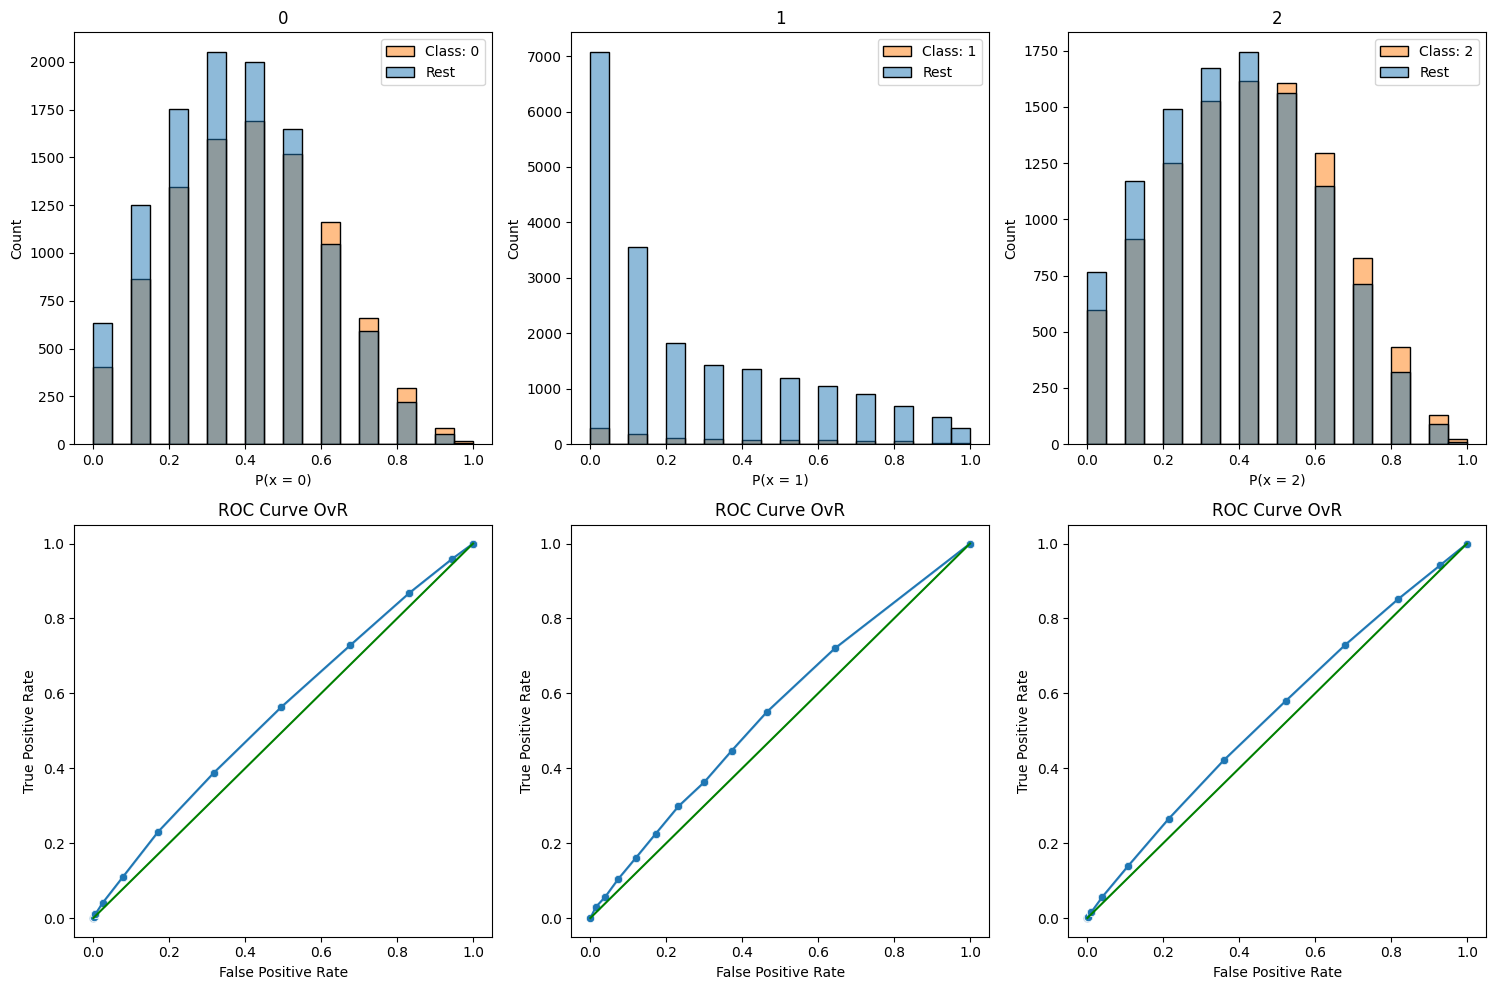

In [29]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = knn.predict(X_test_norm)
y_proba = knn.predict_proba(X_test_norm)
print("Tačnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## GridSearch

tacnost: 0.4582
Histogrami i ROC krive:


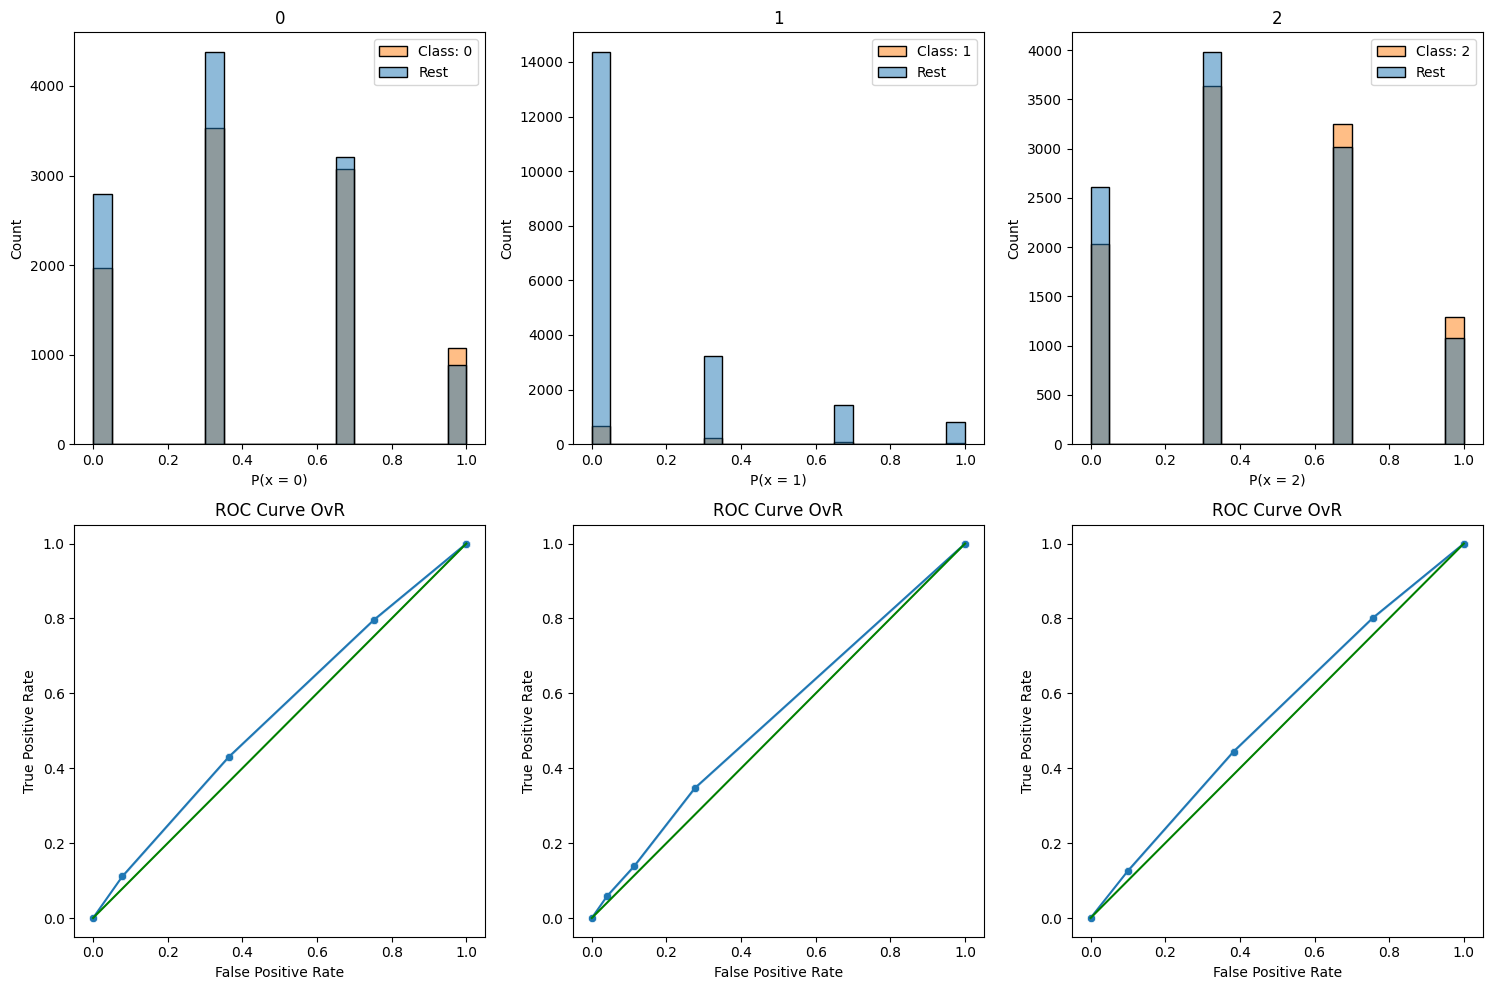

In [30]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = estimator_uniform.best_estimator_.predict(X_test_norm)
y_proba = estimator_uniform.best_estimator_.predict_proba(X_test_norm)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

tacnost: 0.4416
Histogrami i ROC krive:


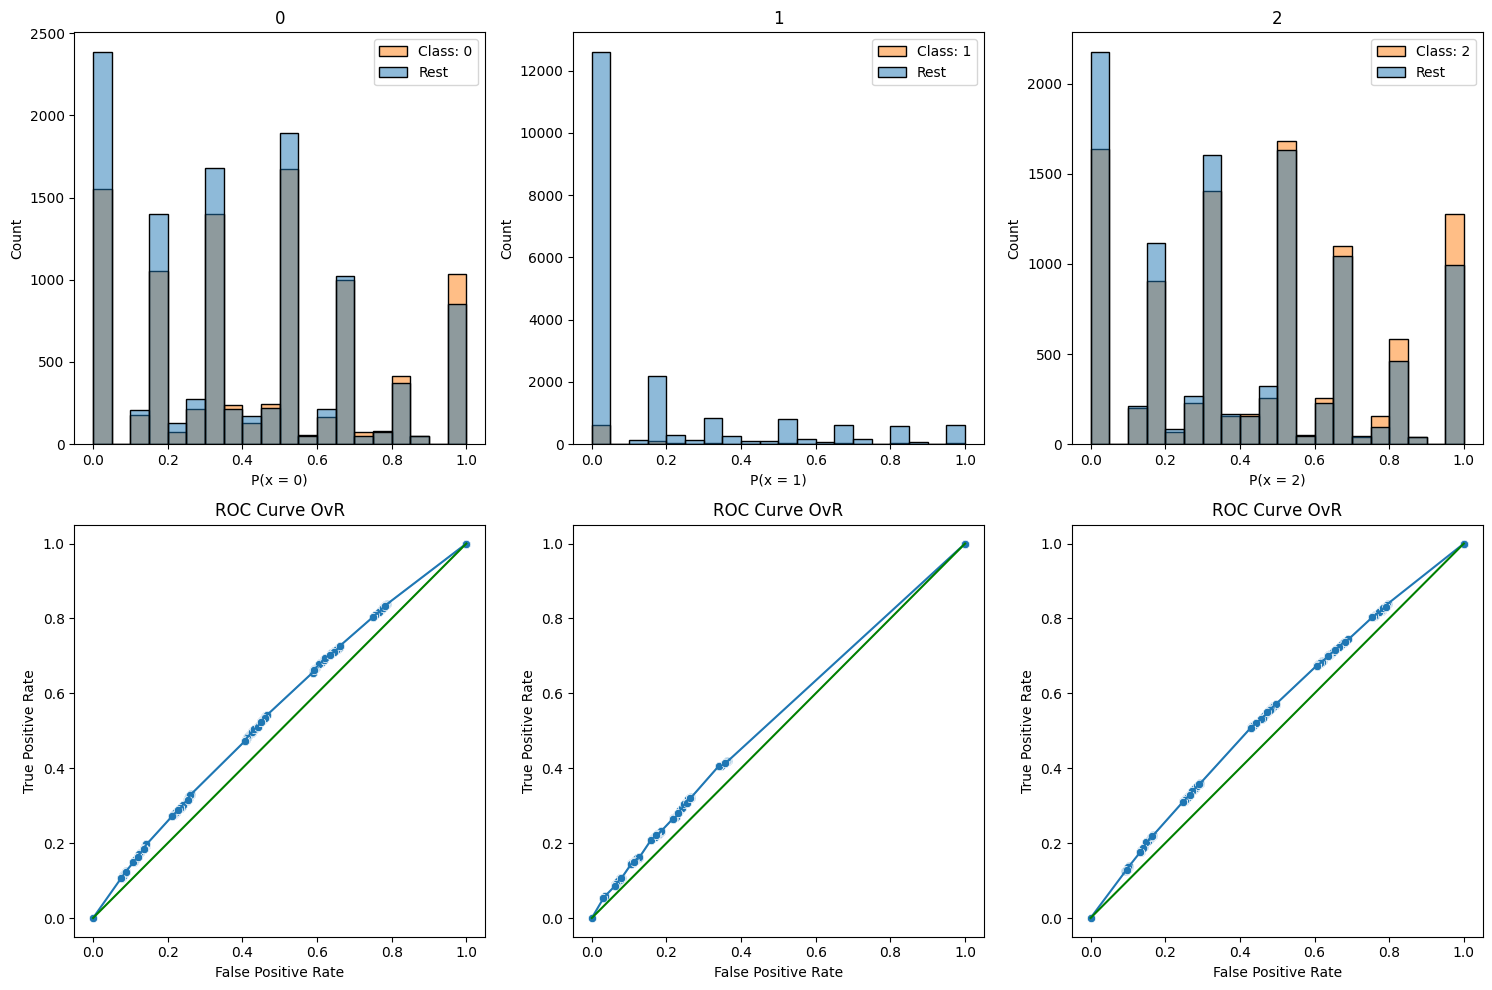

In [31]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = estimator_distance.best_estimator_.predict(X_test_norm)
y_proba = estimator_distance.best_estimator_.predict_proba(X_test_norm)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## Slučajne šume

tacnost: 0.2702
Histogrami i ROC krive:


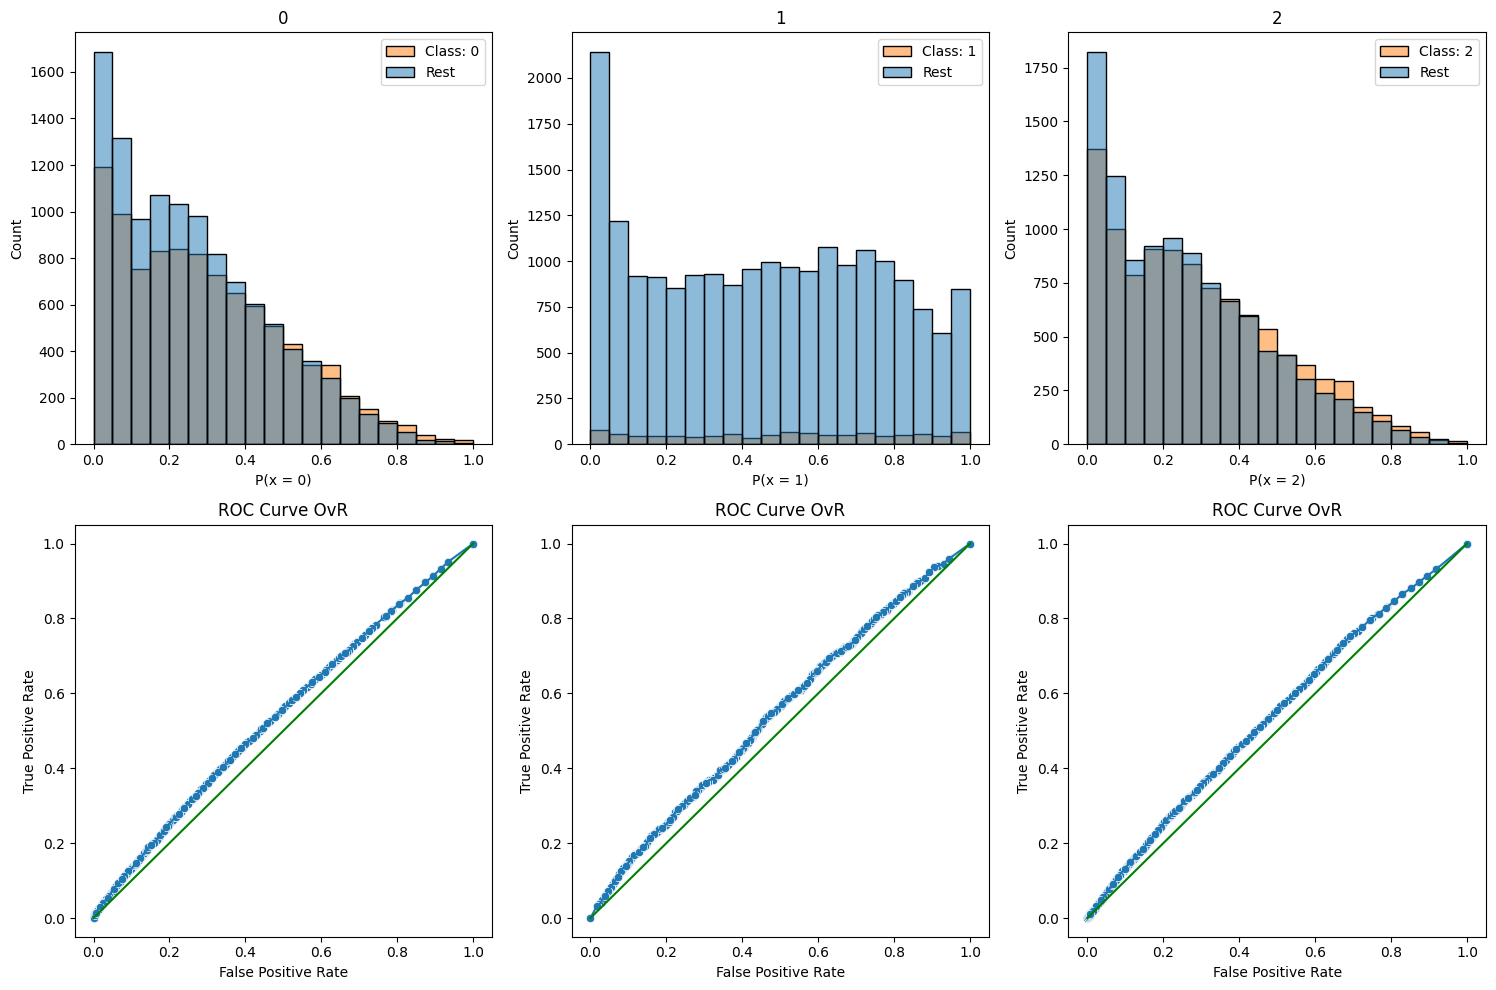

In [32]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = baggingKnn.predict(X_test_norm)
y_proba = baggingKnn.predict_proba(X_test_norm)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()